# Изучаем клиентов и операции

$\large{В\: датасете\: {\color{Purple}{user\_data}}\: содержатся\: следующие\: данные:}$

* <span style="color:green"><b>client</b></span> – идентификатор пользователя
* <span style="color:green"><b>premium</b></span> – является ли клиент премиум
* <span style="color:green"><b>age</b></span> – возраст


$\large{В\: датасете\: {\color{Orange}{logs}}\: содержатся\: следующие\: данные:}$

* <span style="color:blue"><b>client</b></span> – идентификатор пользователя
* <span style="color:blue"><b>success</b></span> – результат (<span style="color:green">успех</span> - 1, <span style="color:red">нет</span> - 0)  
* <span style="color:blue"><b>platform</b></span> – платформа  
* <span style="color:blue"><b>time</b></span> – время в формате Unix


## Есть несколько вопросов, на которые хотелось бы ответить:

1. Какой клиент совершил больше всего успешных операций?
2. С какой платформы осуществляется наибольшее количество успешных операций?
3. Какую платформу предпочитают премиумные клиенты?
4. Как выглядит распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
5. Построим график распределения числа успешных операций и проанализируем её
6. Клиенты какого возраста совершили наибольшее количество успешных действий? (Визуализируем число успешных операций, сделанных на платформе, в зависимости от возраста)

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Задаем настройки

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style="darkgrid")

In [3]:
# Загружаем датасеты

user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
# Смотрим на размер таблиц

print('user_data size: ' + str(user_data.shape),
       'logs size: ' + str(logs.shape), sep='\n')

# Размеры таблицы по количеству пользователей отличаются

user_data size: (2954, 3)
logs size: (4500, 4)


In [7]:
# Типы переменных в таблицах

print('user_data types: \n\n', user_data.dtypes, 
      '\n' + '---' * 6 +'\n\n',
      'logs types: \n\n' , logs.dtypes)

user_data types: 

 client     int64
premium     bool
age        int64
dtype: object 
------------------

 logs types: 

 client       int64
success       bool
platform    object
time         int64
dtype: object


In [8]:
# Наличие пропущенных значений

print(
      user_data.isna().sum(),
      logs.isna().sum(), sep='\n\n')

# Пропущенных значений нет в двух датасетах

client     0
premium    0
age        0
dtype: int64

client      0
success     0
platform    0
time        0
dtype: int64


In [9]:
# Описательная статистика (необходимо использовать метод describe())

user_data.describe(include='all')

,client,premium,age
count,2954.000000,2954,2954.000000
unique,NaN,2,NaN
top,NaN,False,NaN
freq,NaN,2548,NaN
mean,50767.886594,NaN,44.196005
std,28800.505847,NaN,14.248336
min,40.000000,NaN,20.000000
25%,25639.500000,NaN,32.000000
50%,51569.500000,NaN,44.000000
75%,75963.250000,NaN,56.000000


In [10]:
logs.describe(include='all')

# Здесь важно увидеть число уникальных значений для столбцов

,client,success,platform,time
count,4500.000000,4500,4500,4.500000e+03
unique,NaN,2,3,NaN
top,NaN,True,phone,NaN
freq,NaN,3289,2753,NaN
mean,50998.758000,NaN,NaN,1.585440e+09
std,28374.472495,NaN,NaN,2.314866e+04
min,40.000000,NaN,NaN,1.585400e+09
25%,27056.500000,NaN,NaN,1.585420e+09
50%,52659.000000,NaN,NaN,1.585440e+09
75%,76001.250000,NaN,NaN,1.585461e+09


## 1. Какой клиент совершил больше всего успешных операций?

In [11]:
# Такая информация содержится в датасете logs

logs.query('success == True') \
    .groupby('client') \
    .agg({'success': 'sum'}) \
    .sort_values(by=['success', 'client'], ascending=[False, True]) \
    .reset_index() \
    .rename(columns={'success': 'count_true_success'}) \
    .query('count_true_success == count_true_success.max()') \
    .client \
    .to_list()

# Можно не применять метод reset_index(), а использовать параметр в as_index=False в методе  groupby()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [12]:
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'sum'}) \
    .rename(columns={'success': 'count_true_success'}) \
    .sort_values(by=['count_true_success', 'client'], ascending=[False, True]) \
    .query('count_true_success == count_true_success.max()') \
    .client \
    .to_list()

# Получаем id клиентов с максимальным количеством успешных операций

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

## 2. С какой платформы осуществляется наибольшее количество успешных операций?

In [13]:
# Здесь используем датасет logs

logs.query('success == 1') \
    .groupby('platform') \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'platform_counts'}) \
    .sort_values(by='platform_counts', ascending=False)

,platform_counts
platform,
phone,2019
computer,1090
tablet,180


## 3. Какую платформу предпочитают премиумные клиенты?

In [14]:
# Объединим два датасета чтобы ответить на этот вопрос

merge_user_data = logs.merge(user_data, how='inner', on='client')
merge_user_data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [15]:
# В новом датасете сделаем нужный нам запрос

merge_user_data.query('premium == True') \
               .groupby('platform') \
               .agg({'client': 'count'}) \
               .rename(columns={'client': 'count_premium_clients'}) \
               .sort_values(by='count_premium_clients', ascending=False)

,count_premium_clients
platform,
phone,246
computer,150
tablet,24


## 4. Как выглядит распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

/home/d/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/d/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


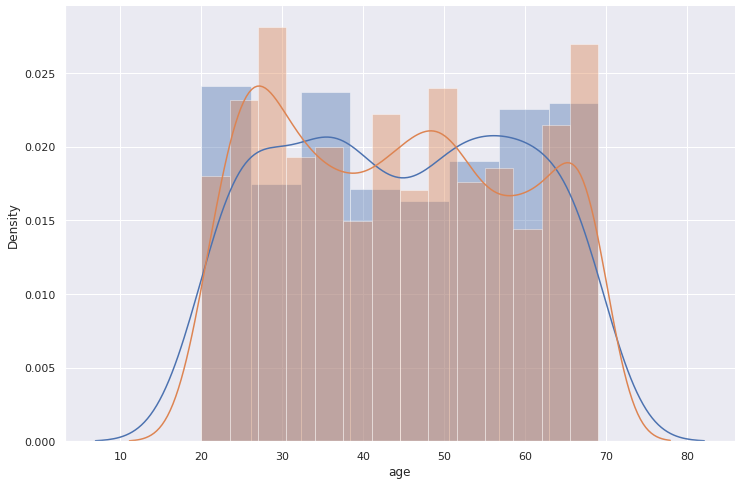

In [16]:
# Подготовим данные для графика

premium_client_age = merge_user_data.query('premium == True').age
non_premium_client_age = merge_user_data.query('premium == False').age


# Добавим два распределения на график 

sns.distplot(premium_client_age)
sns.distplot(non_premium_client_age)

sns.despine()  # убрать часть рамки графика
plt.show()

## 5. Построим график распределения числа успешных операций и проанализируем её

In [17]:
# Подготовим данные для гистограммы

success_operations = merge_user_data.query('success == 1') \
                                    .groupby('client') \
                                    .agg({'success': 'count'}) \
                                    .sort_values(by='success', ascending=False) \
                                    .reset_index() \
                                    .groupby('success') \
                                    .agg({'client': 'count'}) \
                                    .reset_index()
success_operations

,success,client
0,1,2051
1,2,42
2,3,1
3,40,1
4,41,9


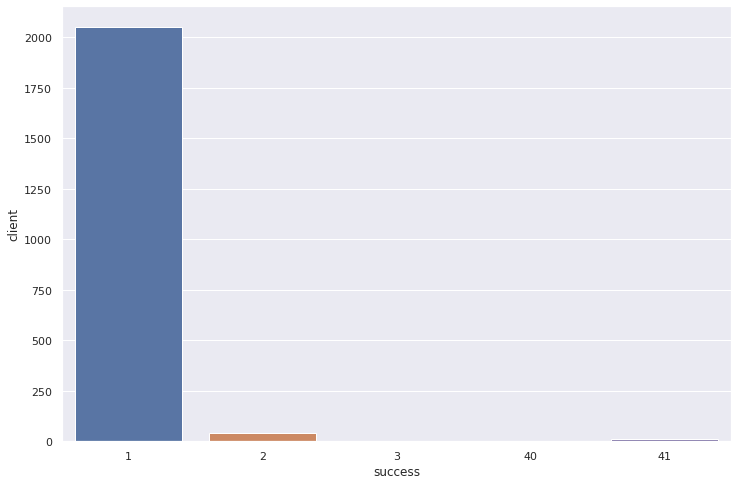

In [18]:
# Построим распределение с осями
# x -> число успешных операций
# y -> число клиентов, совершивших столько успешных операций

sns.barplot(data=success_operations, x='success', y='client')
plt.show()

## 6. Клиенты какого возраста совершили наибольшее количество успешных действий? (Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста)

In [19]:
# Подготовим данные для графика
# Здесь при отборе клиентов нужно
# учесть, что операции успешны и совершены на платформе computer

computer_success = merge_user_data.query("success == 1 & platform == 'computer'")

computer_success.head()

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25


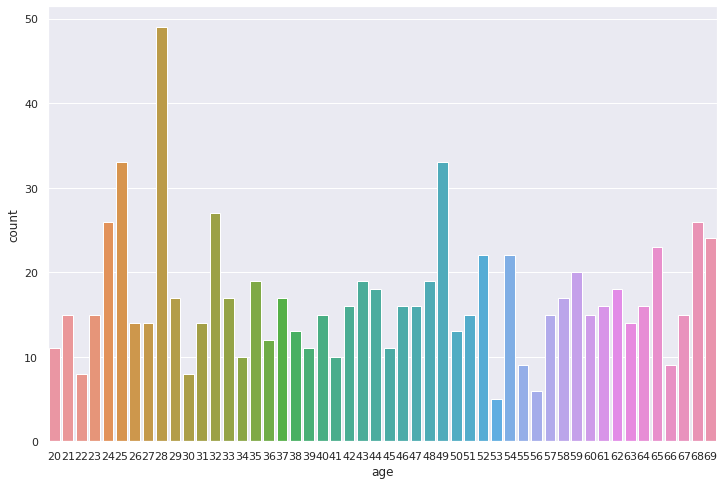

In [20]:
ax = sns.countplot(data=computer_success, x='age')

plt.show()

# Как видно люди 28 лет совершили наибольшее количество успешных операций